<h1 style="font-family:verdana;color:red">DBSCAN Clustering</h1>

The [**```DBSCAN```**](http://scikit-learn.org/stable/modules/clustering.html#dbscan) algorithm views clusters as areas of high density separated by areas of low density. 
<p style="font-size:125%;color:blue">Due to this rather generic view, clusters found by DBSCAN can be any shape, as opposed to k-means which assumes that clusters are convex shaped.</p>

The central component to the DBSCAN is the concept of core samples, which are samples that are in areas of high density. A cluster is therefore a set of core samples, each close to each other (measured by some distance measure) and a set of non-core samples that are close to a core sample (but are not themselves core samples).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn import cluster, datasets

In [3]:
n_samples = 1500
noisy_circles, circle_labels = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons, moon_labels = datasets.make_moons(n_samples=n_samples, noise=0.1)

In [4]:
noisy_circles.shape

(1500, 2)

In [5]:
noisy_moons.shape

(1500, 2)

In [6]:
noisy_moons = np.array(noisy_moons)
noisy_circles = np.array(noisy_circles)

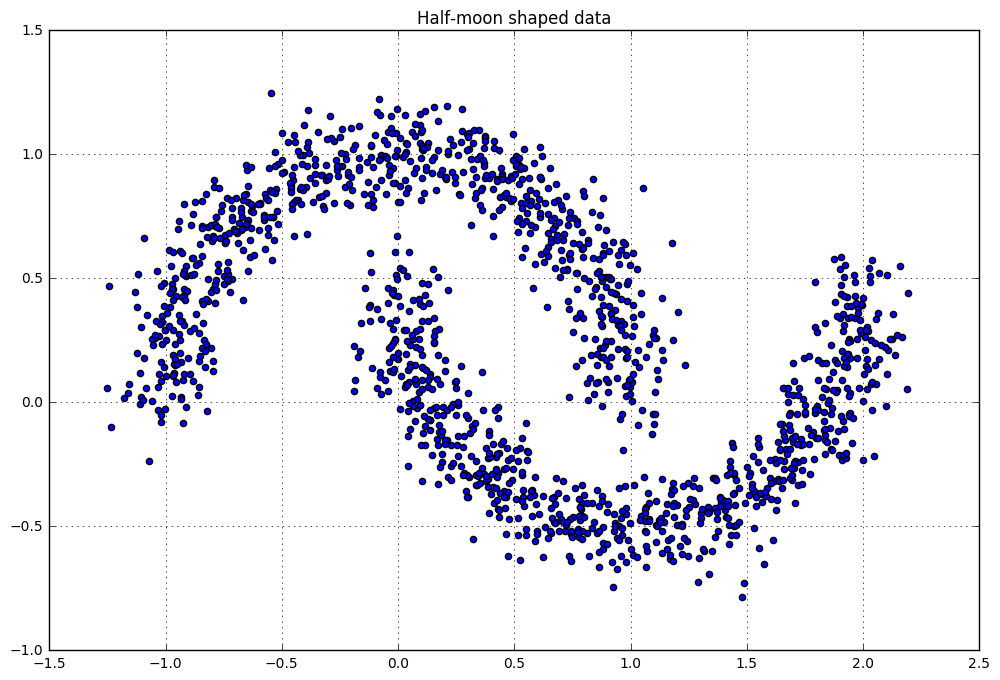

In [7]:
plt.figure(figsize=(12,8))
plt.title('Half-moon shaped data')
plt.grid(True)
plt.scatter(x=noisy_moons[:, 0], y=noisy_moons[:, 1])

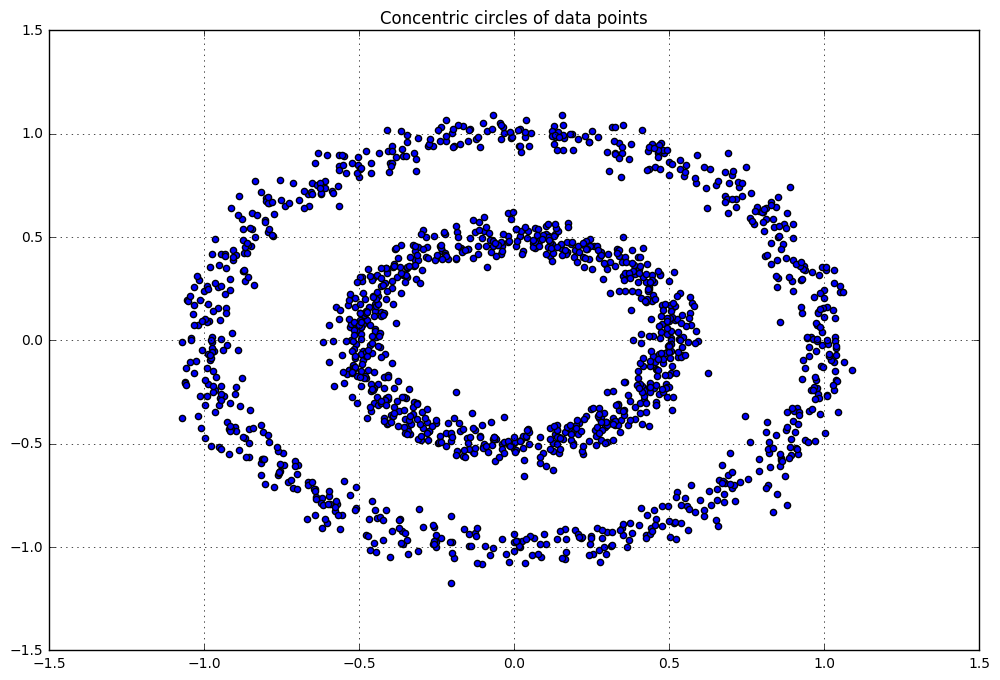

In [8]:
plt.figure(figsize=(12,8))
plt.title('Concentric circles of data points')
plt.grid(True)
plt.scatter(x=noisy_circles[:,0], y=noisy_circles[:,1])

## Can k-means identify the right clusters?

In [9]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(noisy_moons)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

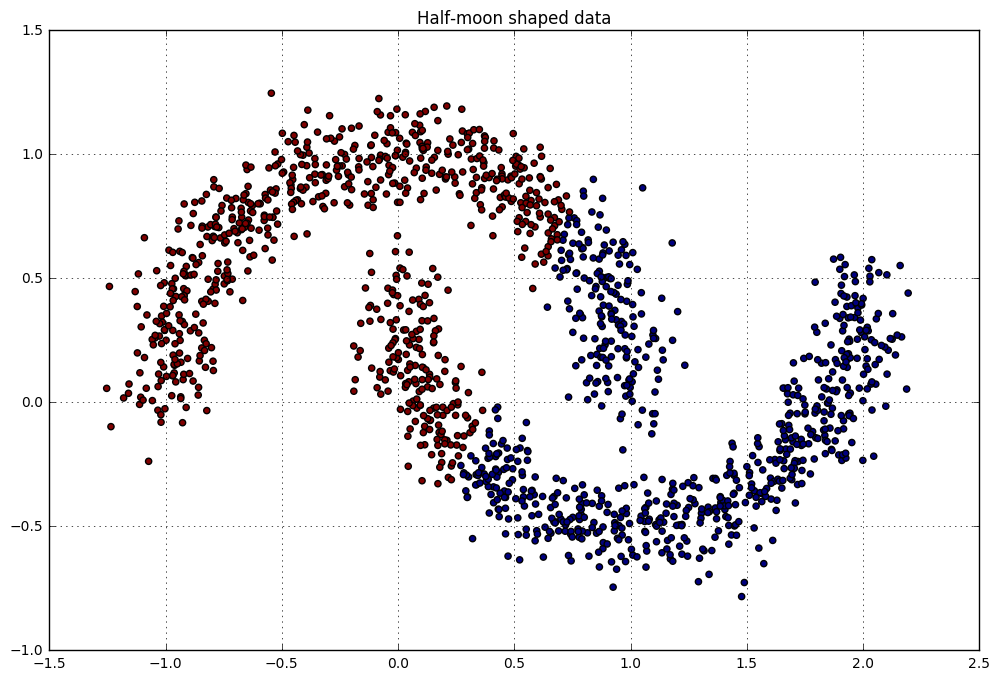

In [10]:
plt.figure(figsize=(12,8))
plt.title('Half-moon shaped data')
plt.grid(True)
plt.scatter(x=noisy_moons[:,0], y=noisy_moons[:,1], c=kmeans.labels_)

In [11]:
kmeans = cluster.KMeans(n_clusters=2)
kmeans.fit(noisy_circles)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

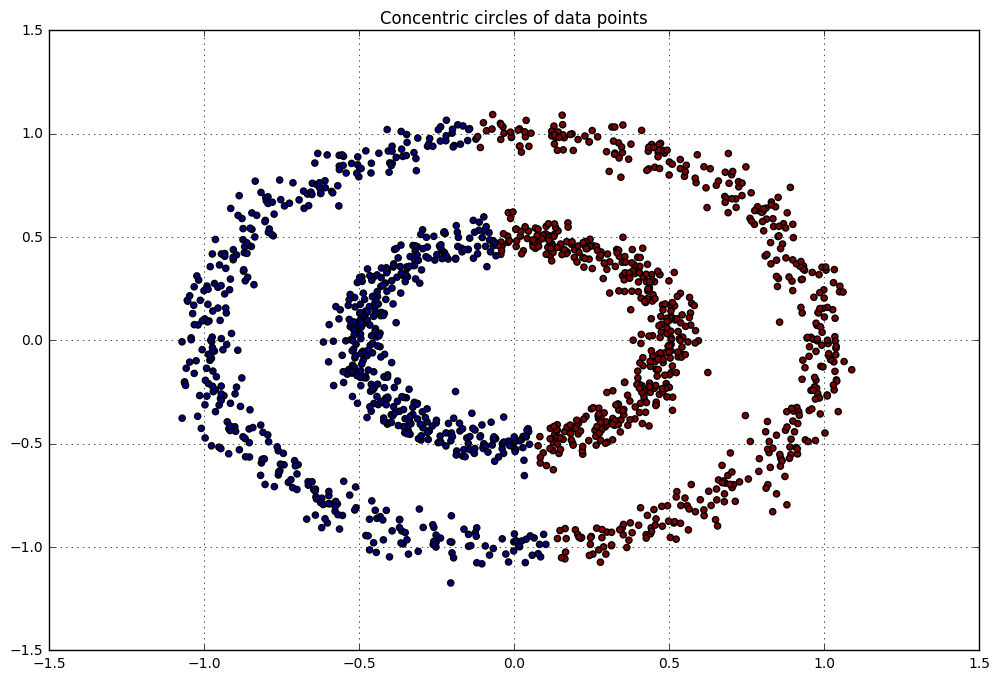

In [12]:
plt.figure(figsize=(12,8))
plt.title('Concentric circles of data points')
plt.grid(True)
plt.scatter(x=noisy_circles[:,0], y=noisy_circles[:,1], c=kmeans.labels_)

## How does DBSCAN perform?

In [13]:
dbs = cluster.DBSCAN(eps=0.1)
dbs.fit(noisy_moons)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

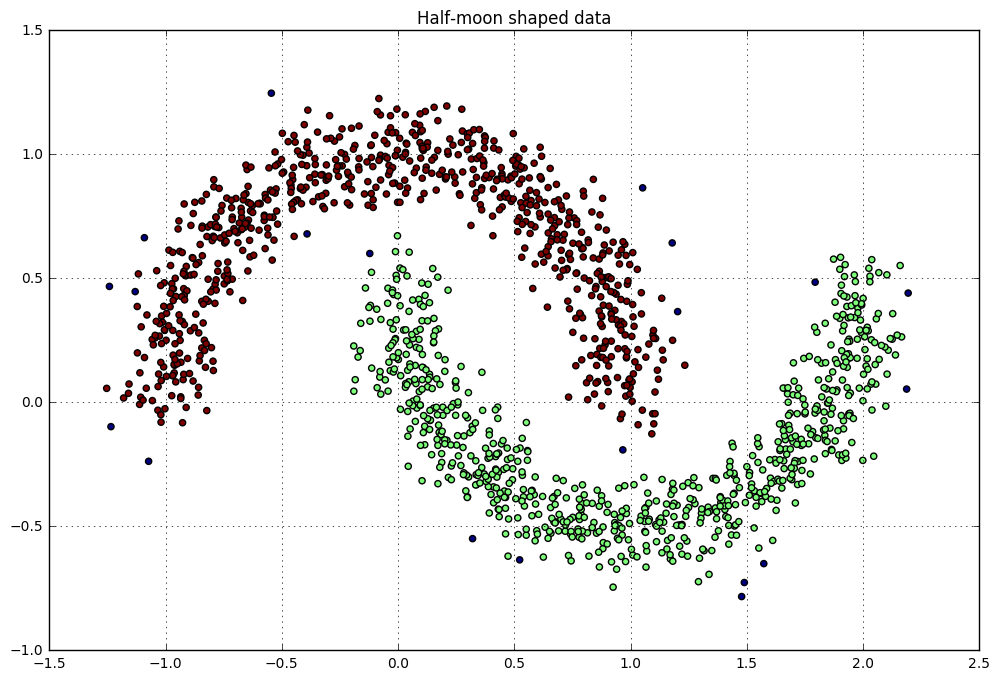

In [14]:
plt.figure(figsize=(12,8))
plt.title('Half-moon shaped data')
plt.grid(True)
plt.scatter(x=noisy_moons[:,0], y=noisy_moons[:,1], c=dbs.labels_)

In [15]:
dbs = cluster.DBSCAN(eps=0.1)
dbs.fit(noisy_circles)

DBSCAN(algorithm='auto', eps=0.1, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=1, p=None)

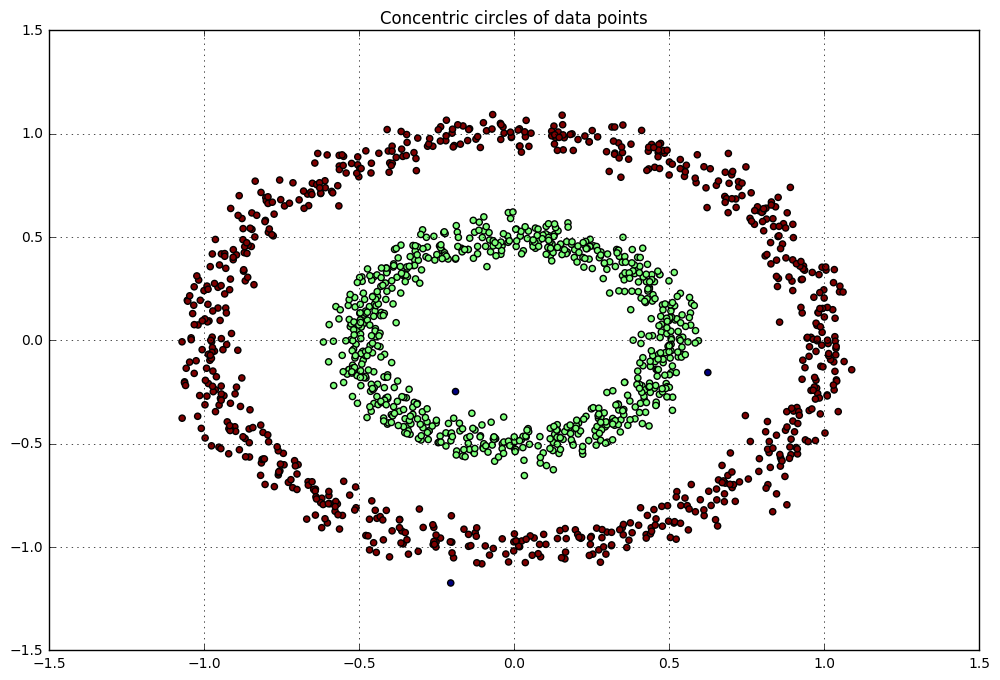

In [16]:
plt.figure(figsize=(12,8))
plt.title('Concentric circles of data points')
plt.grid(True)
plt.scatter(x=noisy_circles[:,0], y=noisy_circles[:,1], c=dbs.labels_)